

# Project: Investigate a Dataset ('tmdb-movies')

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='Introduction'></a>
# Introduction



# Project name  'tmdb-movies'
## Overview and Notes

# target: 
...This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.

* understand data
* clear unnecessary values 
* replace the necessary missing values with mean value 
* analysis the clean data  to get answers, values and facts.

### The main questions 
1. what is the effect of the budget?
+ who are the top 5 director (depend of count of thier films in tmdb movies list)?
+ Is the top director always Make a good profit ?

#### For Sir . Anthony Hopkins

1. is the most costed film for Hopkins is the most profitable?
- is all Anthony films profit or it could lose ?!




<a id='wrangling'></a>
## Data Wrangling



### General Properties

1. Load Data
2. Read Data 
3. Data Visualization 
+ Data Shape , info , description , check if there is a missing data , and see the relations using charts  

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from datetime import datetime as dt


In [38]:
films=pd.read_csv('tmdb-movies.csv')
films.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [39]:
films.shape

(10866, 21)

In [40]:
films.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [41]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [42]:
films.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


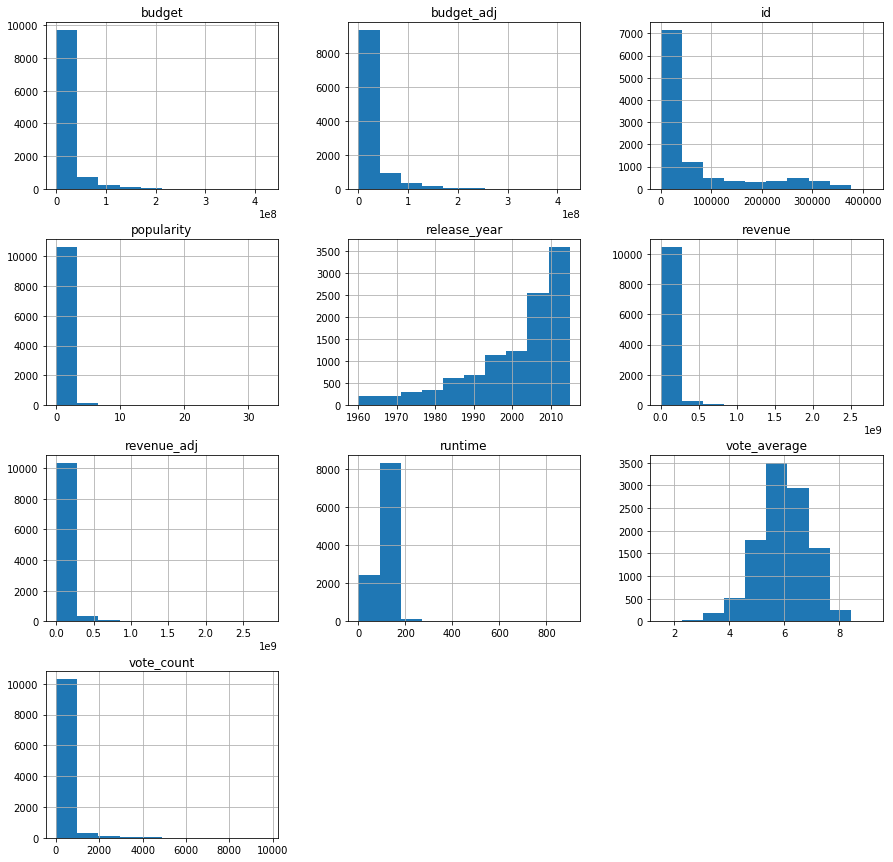

In [43]:
films.hist(figsize=(15,15),bins=10);


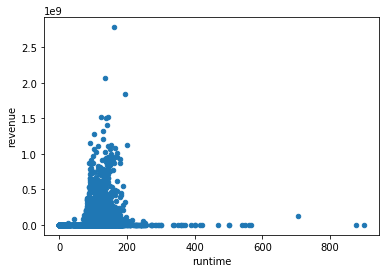

In [44]:
films.plot(x="runtime", y="revenue", kind="scatter");

### From charts:
⋅⋅⋅we understand some facts 
+ most Movies have a high budget 
+ most of the vote average is a normal distribution 
+ in each new year the No of the released movie will increase 
+ run time not very effective as budget on movie revenue 


### Data Cleaning (Steps And Tricks )

#### After discovering the data previously we need to do :
+ clean by remove missing Data and drop unnecessary columns
+ need to replace zero values with mean 
+ replace non-values with True
+ remove duplicate values



In [13]:
films.mean()

id              6.606418e+04
popularity      6.464410e-01
budget          1.462570e+07
revenue         3.982332e+07
runtime         1.020709e+02
vote_count      2.173897e+02
vote_average    5.974922e+00
release_year    2.001323e+03
budget_adj      1.755104e+07
revenue_adj     5.136436e+07
dtype: float64

In [14]:
print (films[films['popularity']==0].shape)

(0, 21)


In [15]:
print (films[films['budget']==0].shape)

(5696, 21)


In [16]:
print (films[films['revenue']==0].shape)

(6016, 21)


In [17]:
print (films[films['runtime']==0].shape)

(31, 21)


In [18]:
print (films[films['vote_count']==0].shape)

(0, 21)


In [19]:
print (films[films['vote_average']==0].shape)

(0, 21)


In [20]:
films['budget'] = films['budget'].replace(0, 1.462570e+07)

In [21]:
print (films[films['budget']==0].shape)

(0, 21)


In [22]:
films['revenue'] = films['revenue'].replace(0, 3.982332e+07)
print (films[films['revenue']==0].shape)

(0, 21)


In [23]:
films['runtime'] = films['runtime'].replace(0, 1.020709e+02)
print (films[films['runtime']==0].shape)

(0, 21)


In [24]:
films.drop(['id','imdb_id', 'homepage', 'keywords', 'revenue_adj', 'budget_adj', 'production_companies', 'tagline'], axis=1,inplace=True)

In [25]:
films.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [26]:
films.shape

(10866, 13)

In [27]:
films.duplicated().sum()

1

In [28]:
films.drop_duplicates(inplace=True)

In [29]:
films.duplicated().sum()

0

In [30]:
films.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [31]:
films.fillna(0,inplace=True)

In [32]:
films['cast']=films['cast'].replace(0,np.NaN)
films['director']=films['director'].replace(0,np.NaN)
films['genres']=films['genres'].replace(0,np.NaN)
films.dropna(inplace=True)

In [33]:
films.shape

(10731, 13)

In [34]:
films.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what is the effect of the budget?)

In [35]:
# the first ques is the relation between profit and cost is is connect ?
#the profit depend on movie review?

films['net_profit']=films['revenue']-films['budget']
films.head(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,net_profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1363528810


In [36]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
overview          10731 non-null object
runtime           10731 non-null float64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
net_profit        10731 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


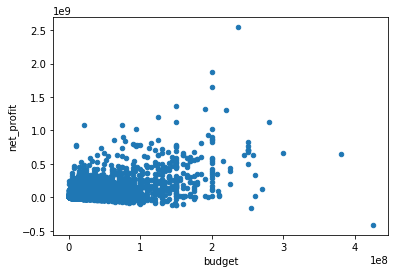

In [33]:
films.plot(x="budget", y="net_profit", kind="scatter");

In [34]:
films.sort_values(['net_profit'],ascending = False).head(1)


,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,net_profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162.0,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2544505847


In [35]:
films.sort_values(['budget'],ascending = False).head(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,net_profit
2244,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100.0,Adventure|Fantasy|Action|Western|Thriller,12/2/10,74,6.4,2010,-413912431


In [36]:

films.sort_values(['vote_average'],ascending = False).head(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,net_profit
3894,0.006925,14625700,39823320,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,"The Story of Film: An Odyssey, written and dir...",900.0,Documentary,9/3/11,14,9.2,2011,25197620


### Answer of Q1:

### the plot Shoe That the relation between the budget and Net_profit is  `Positive` but there is a lot of Exceptions.
______________________________________________________________________________________________________________________________


### Research Question 2&3
### Top 5 Directors 
+ who are the top 5 director (depend of count of thier films in tmdb movies list)?
+ Is the top director always Make a good profit ?

In [57]:
Top_director=films.director.value_counts()
Top_director.head()

Woody Allen         45
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     28
Ridley Scott        23
Name: director, dtype: int64

In [62]:
Woody_Allen_films= films[films.director.str.contains("Woody Allen")]
A=Woody_Allen_films.net_profit.mean()  

Clint_Eastwood_films= films[films.director.str.contains("Clint Eastwood")]
B=Clint_Eastwood_films.net_profit.mean()

Steven_Spielberg_films= films[films.director.str.contains("Steven Spielberg")]
C=Steven_Spielberg_films.net_profit.mean()


Martin_Scorsese_films= films[films.director.str.contains("Martin Scorsese")]
D=Martin_Scorsese_films.net_profit.mean()


Ridley_Scott_films= films[films.director.str.contains("Ridley Scott")]
E=Ridley_Scott_films.net_profit.mean()



print(A,B,C,D,E)



25845003.4348 63778700.4412 250923711.033 46113985.3 95317134.7826


In [66]:
if A > films.net_profit.mean():
    print (" Most of Woody Allen films is successful ")
else:
    print (" Most of Woody Allen films is  not always successful ")
    
if B > films.net_profit.mean():
    print (" Most of Clint Eastwood films is successful ")
else:
    print (" Most of Clint Eastwood films is  not always successful ")
    
    
if C > films.net_profit.mean():
    print (" Most of Steven Spielberg films is successful ")
else:
    print (" Most of Steven Spielberg films is  not always successful ")
    
if D > films.net_profit.mean():
    print (" Most of Martin Scorsese films is successful ")
else:
    print (" Most of Martin Scorsese films is  not always successful ")
    
if E > films.net_profit.mean():
    print (" Most of Ridley Scott films is successful ")
else:
    print (" Most of Ridley Scott films is  not always successful ")
    
    

 Most of Woody Allen films is  not always successful 
 Most of Clint Eastwood films is successful 
 Most of Steven Spielberg films is successful 
 Most of Martin Scorsese films is successful 
 Most of Ridley Scott films is successful 


### Answer of Q2&3:
 - Most of Woody Allen films is  `not` always `successful` 
 - Most of Clint Eastwood films is `successful` 
 - Most of Steven Spielberg films is `successful` 
 - Most of Martin Scorsese films is `successful` 
 - Most of Ridley Scott films is `successful`


**Continue to explore the data to address your additional research questions**

**Add more headers as needed**

### Research Questions 
#### For Sir . Anthony Hopkins
#### Oscar best actor winner 2021 
- sort all films of my favorite actor
- is the most costed film for Hopkins is the most profitable?
- is all Anthony films profit or it could lose ?!

In [ ]:
anthony_hopkins_films= films[films.cast.str.contains("Anthony Hopkins")]

In [44]:
anthony_hopkins_films.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,net_profit
36,3.358321,14625700,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,"A psychic doctor, John Clancy, works with an F...",101.0,Crime|Drama|Mystery,9/3/15,474,6.2,2015,7728872
164,0.917040,14625700,39823320,Kidnapping Mr. Heineken,Anthony Hopkins|Jim Sturgess|Sam Worthington|R...,Daniel Alfredson,The true story of the kidnapping of Freddy Hei...,95.0,Drama|Action|Crime|Thriller,3/12/15,131,5.8,2015,25197620
686,2.526779,125000000,362637473,Noah,Russell Crowe|Jennifer Connelly|Emma Watson|Lo...,Darren Aronofsky,A man who suffers visions of an apocalyptic de...,139.0,Drama|Adventure,3/20/14,1589,5.5,2014,237637473
1350,0.391055,14625700,39823320,Audrey Rose,Anthony Hopkins|Marsha Mason|John Beck|Susan S...,Robert Wise,A man is convinced that a young girl is the re...,113.0,Fantasy|Drama|Horror|Thriller,4/6/77,12,5.5,1977,25197620
2069,0.642475,150000000,39823320,The Wolfman,Benicio del Toro|Anthony Hopkins|Emily Blunt|H...,Joe Johnston,"Lawrence Talbot, an American man on a visit to...",102.0,Horror|Thriller|Drama,2/11/10,299,5.4,2010,-110176680


In [45]:
anthony_hopkins_films.sort_values(['budget'],ascending = False).head(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,net_profit
5424,5.1119,170000000,479765000,Thor: The Dark World,Chris Hemsworth|Natalie Portman|Tom Hiddleston...,Alan Taylor,Thor fights to restore order across the cosmos...,112.0,Action|Adventure|Fantasy,10/29/13,3025,6.8,2013,309765000


In [46]:
anthony_hopkins_films.sort_values(['net_profit'],ascending = False).head(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,net_profit
5424,5.1119,170000000,479765000,Thor: The Dark World,Chris Hemsworth|Natalie Portman|Tom Hiddleston...,Alan Taylor,Thor fights to restore order across the cosmos...,112.0,Action|Adventure|Fantasy,10/29/13,3025,6.8,2013,309765000


### *so for Anthony Hopkins Movie list,   the same film with the high budget has the highest profit*

In [48]:
anthony_hopkins_films.sort_values(['net_profit'],ascending = True).head(5)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,net_profit
2069,0.642475,150000000,39823320,The Wolfman,Benicio del Toro|Anthony Hopkins|Emily Blunt|H...,Joe Johnston,"Lawrence Talbot, an American man on a visit to...",102.0,Horror|Thriller|Drama,2/11/10,299,5.4,2010,-110176680
5470,1.675461,84000000,39823320,RED 2,Bruce Willis|Catherine Zeta-Jones|Anthony Hopk...,Dean Parisot,Retired C.I.A. agent Frank Moses reunites his ...,116.0,Action|Comedy|Crime|Thriller,7/18/13,1109,6.3,2013,-44176680
8134,0.604331,44000000,13681765,Nixon,Anthony Hopkins|Joan Allen|Powers Boothe|Ed Ha...,Oliver Stone,An all-star cast powers this epic look at Amer...,192.0,History|Drama,12/22/95,30,6.3,1995,-30318235
4537,0.548029,14625700,1663931,360,Rachel Weisz|Jude Law|Ben Foster|Anthony Hopki...,Fernando Meirelles,Inspired by Arthur Schnitzler's classic La Ron...,110.0,Drama|Romance,7/25/12,44,5.7,2012,-12961769
6259,0.918476,20000000,7535331,Proof,Gwyneth Paltrow|Anthony Hopkins|Jake Gyllenhaa...,John Madden,Catherine is a woman in her late twenties who ...,100.0,Drama|Mystery,9/5/05,88,6.1,2005,-12464669


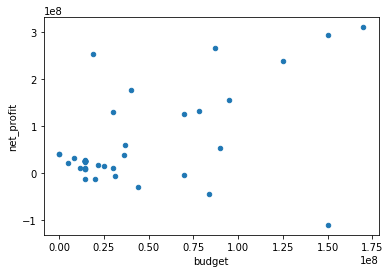

In [49]:
anthony_hopkins_films.plot(x="budget", y="net_profit", kind="scatter");

In [50]:
anthony_hopkins_films.shape

(42, 14)

In [51]:
anthony_hopkins_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 36 to 10789
Data columns (total 14 columns):
popularity        42 non-null float64
budget            42 non-null int64
revenue           42 non-null int64
original_title    42 non-null object
cast              42 non-null object
director          42 non-null object
overview          42 non-null object
runtime           42 non-null float64
genres            42 non-null object
release_date      42 non-null object
vote_count        42 non-null int64
vote_average      42 non-null float64
release_year      42 non-null int64
net_profit        42 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 4.9+ KB


In [52]:
profit= (anthony_hopkins_films.net_profit > 0).sum()
print ('the count of sussccful movies is :',profit)
loss= (anthony_hopkins_films.net_profit <= 0).sum()
print ('the count of unsussccful movies is :',loss)

the count of sussccful movies is : 35
the count of unsussccful movies is : 7


### so he have some` 7` unprofitable movie . *unpredictable* 

<a id='conclusions'></a>
## Conclusions

> **1** I used `tmdb-Movies` to explore popular films depend on budget and revenue because I am thinking that the Net profit is a perfect Key to Understand if the films make the Expected effect or not.

> **2**: I was really curious if Anthony Hopkins the winner of Best Actor in `oscar 2021` can make any unprofitable film?
so, surprisingly he has some unprofitable films. 

## limitations of My Project 
- the data is not really New (ended in 2010)
- a lot of data was missing and I dropped it 
- some Movies make an unexpected profit may be because of movie type Or a special releasing time like in summer or in the new year 


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0